<a href="https://colab.research.google.com/github/SolbiChoi/test_deeplearning/blob/master/BostonHousing_Regression02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data

## Dataset

In [33]:
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=113)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [34]:
type(x_train)

numpy.ndarray

In [35]:
import pandas as pd

In [36]:
dfr = pd.DataFrame(x_train)
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [37]:
import sqlite3

In [38]:
connect = sqlite3.connect('./db.sqlite3')

In [39]:
dfr.to_sql('boston_housing_resource',connect,if_exists='append',index=False)

In [40]:
df = pd.read_sql_query('select * from boston_housing_resource',connect)

In [41]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.233101,23.748076,6.805681,0.241039,0.117196,0.709201,27.917583,2.028538,8.691175,166.237100,2.198564,94.033402,7.248552
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [ ]:
df = pd.DataFrame(x_train)
df.describe()

## Model & Fit

In [71]:
model = tf.keras.models.Sequential()

In [72]:
model.add(tf.keras.Input(shape=(13,))) # input layer

model.add(tf.keras.layers.Dense(64, activation='relu')) # 기능 layer - 64 : 2의 배수 사용 / 항아리모양이 되도록 구성
model.add(tf.keras.layers.Dense(128, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(32, activation='relu')) # hidden layer

model.add(tf.keras.layers.Dense(1,)) # output layer - 1 : LogisticRegression 갯수 / 항상 output의 갯수가 1인 것은 아님(class의 갯수)

model.compile(optimizer='adam',loss='mse', metrics=['mae'])

연속형일 때 Regression 사용 아웃풋 1개, 분류형일 때는 결과만큼 아웃풋이 있는 것

분류형일때는 분류하는 만큼이 결과로 아웃풋이 나오고, 연속형은 결과 하나가 아웃풋으로 나온다

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

In [74]:
hist = model.fit(x_train, y_train, epochs=500, validation_split=0.3)

Epoch 1/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0813 - mae: 0.1847 - val_loss: 19.5107 - val_mae: 2.8429
Epoch 2/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0958 - mae: 0.2163 - val_loss: 19.1580 - val_mae: 2.8163
Epoch 3/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1083 - mae: 0.2372 - val_loss: 19.5714 - val_mae: 2.8615
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1503 - mae: 0.2935 - val_loss: 18.7725 - val_mae: 2.7958
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1700 - mae: 0.2960 - val_loss: 19.5500 - val_mae: 2.8563
Epoch 6/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2188 - mae: 0.3593 - val_loss: 19.0874 - val_mae: 2.8334
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1227 - mae: 0.2683 - val_loss: 19.6912 - val_mae: 2.8573
Epoch 8/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1220 - mae: 0.261

## evaluation

In [50]:
# model.evaluate(x_train,y_train) # activation = sigmoid - loss: 8.3300 - mae: 2.1364

13/13 [==============================] - 0s 1ms/step - loss: 8.3300 - mae: 2.1364


[8.330029487609863, 2.1363582611083984]

In [75]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [79]:
import matplotlib.pyplot as plt

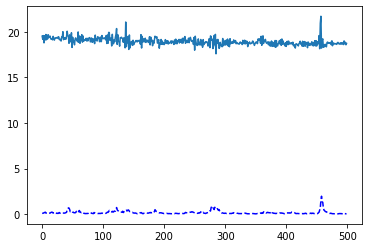

In [80]:
plt.plot(hist.history['loss'],'--b')
plt.plot(hist.history['val_loss'])
plt.show()

## Service

In [69]:
x_train[10]

array([ 0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491])

In [70]:
model.predict([[ 0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491]])

array([[11.775159]], dtype=float32)

In [53]:
y_train[10]

12.1